In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV,Ridge
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = load_breast_cancer()

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [67]:
X,y = data.data, data.target
feature_names = data.feature_names
labels = data.target_names
print(labels)

['malignant' 'benign']


In [17]:
# Standardizing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#Adding noisy data
np.random.seed(42)
noise_factor = 0.5
X_noise = X_scaled + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=X.shape)

In [66]:
df = pd.DataFrame(X_scaled,columns=feature_names)
df_noise = pd.DataFrame(X_noise,columns=feature_names)
df_noise.to_csv("BreastCancerFullData.csv")

(array([ 7., 12., 33., 68., 80., 77., 74., 74., 40., 31., 29., 15., 10.,
         7.,  4.,  4.,  3.,  0.,  0.,  1.]),
 array([-2.46088217, -2.081988  , -1.70309382, -1.32419965, -0.94530547,
        -0.5664113 , -0.18751712,  0.19137705,  0.57027123,  0.9491654 ,
         1.32805958,  1.70695375,  2.08584793,  2.4647421 ,  2.84363628,
         3.22253045,  3.60142463,  3.98031881,  4.35921298,  4.73810716,
         5.11700133]),
 <BarContainer object of 20 artists>)

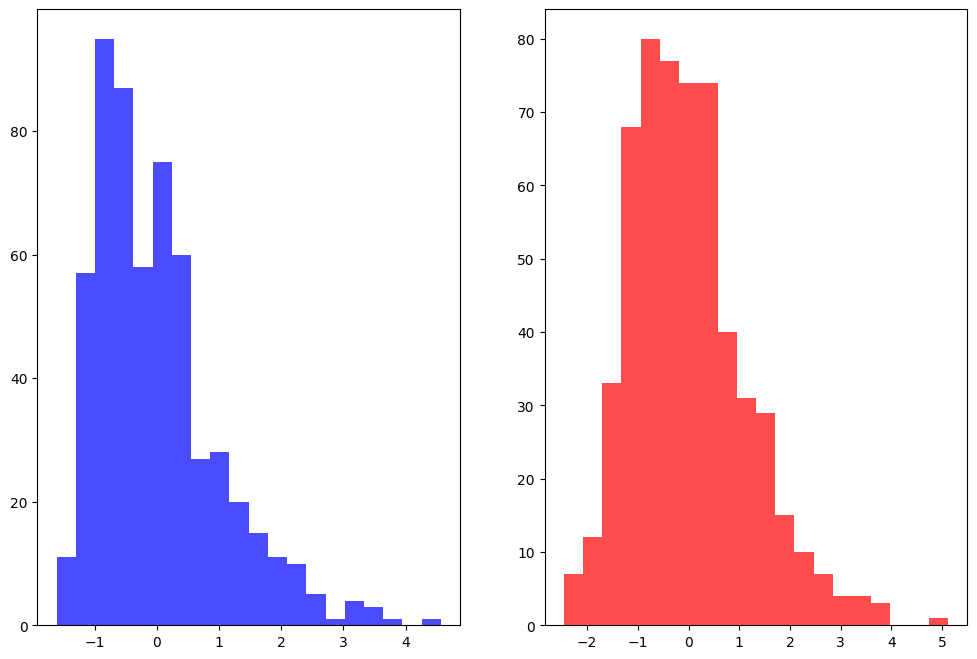

In [33]:
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.hist(df[feature_names[5]],bins=20,alpha=0.7,color='blue',label="Original")
plt.subplot(1,2,2)
plt.hist(df_noise[feature_names[5]],bins=20,alpha=0.7,color='red',label="Noise")

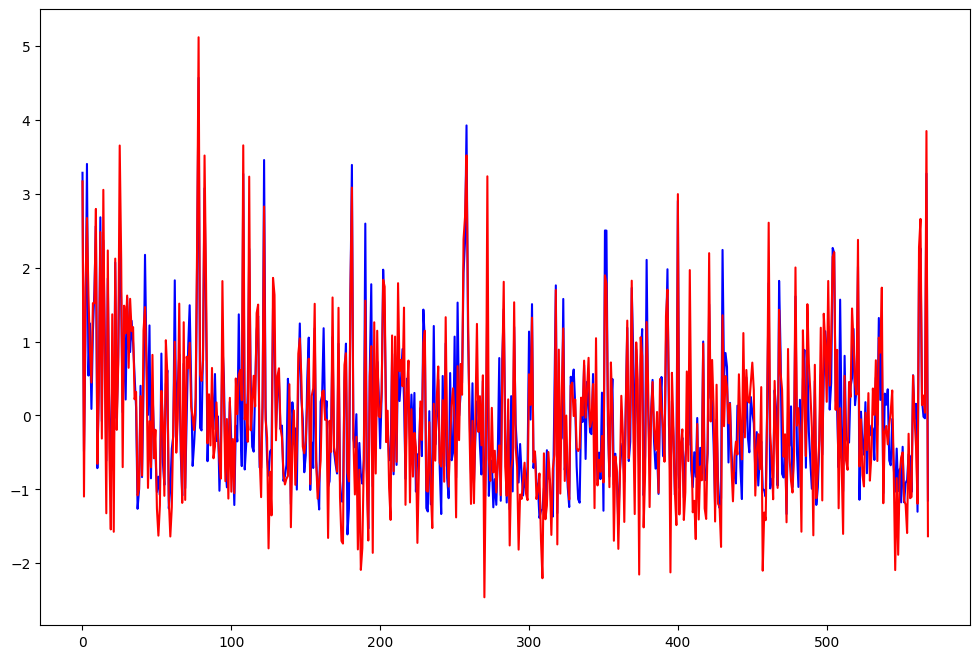

In [34]:
plt.figure(figsize=[12,8])
plt.plot(df[feature_names[5]],color='blue',label='Original')
plt.plot(df_noise[feature_names[5]],color='r',label='Noise')

Text(0, 0.5, 'Noise')

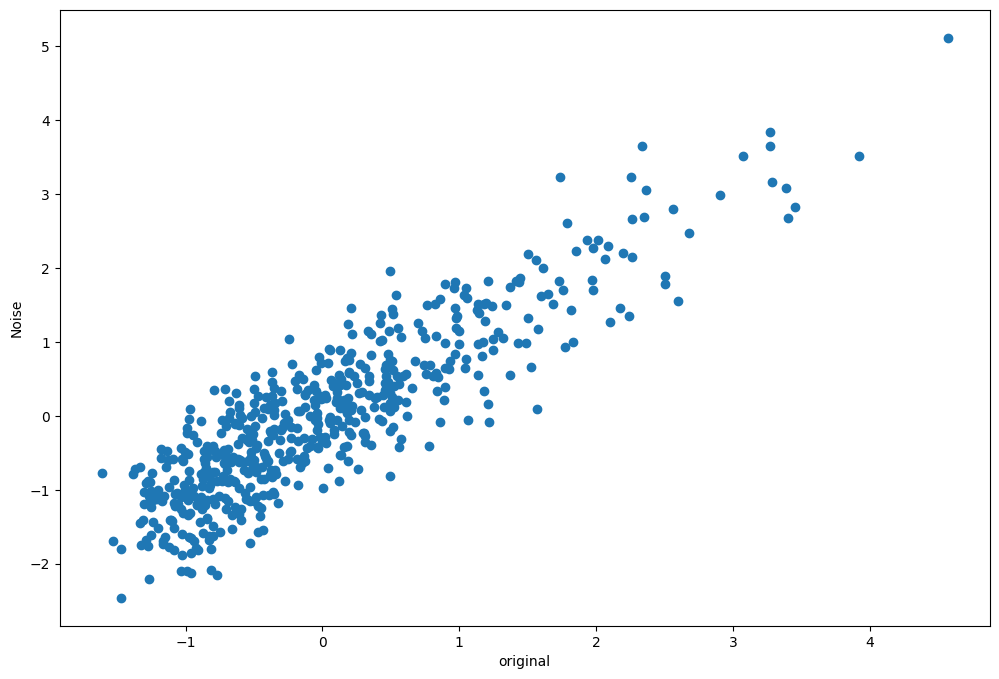

In [35]:
plt.figure(figsize=[12,8])
plt.scatter(df[feature_names[5]],df_noise[feature_names[5]])
plt.xlabel("original")
plt.ylabel("Noise")

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_noise, y,test_size=0.2,random_state=42)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear',C=1, random_state=42)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=42)

In [49]:
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)

In [50]:
accuracy_score(y_test,yhat_knn)

0.9298245614035088

In [51]:
accuracy_score(y_test,yhat_svc)

0.956140350877193

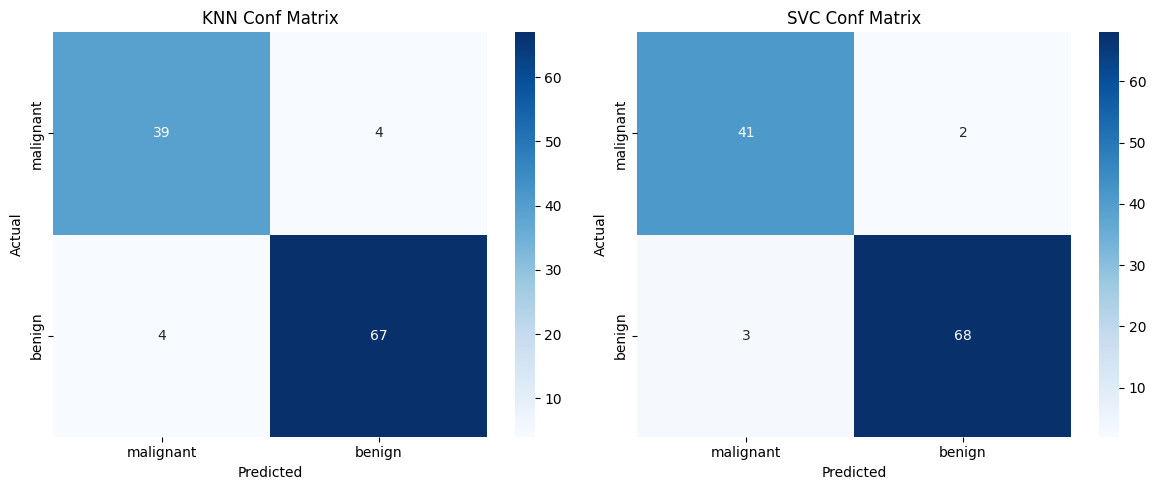

In [64]:
confusion_matrix_knn = confusion_matrix(y_test,yhat_knn)
confusion_matrix_svc = confusion_matrix(y_test,yhat_svc)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix_knn,annot=True,cmap='Blues',ax=axes[0],xticklabels=labels,yticklabels=labels )
axes[0].set_title("KNN Conf Matrix")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix_svc,annot=True,cmap='Blues',ax=axes[1],xticklabels=labels,yticklabels=labels )
axes[1].set_title("SVC Conf Matrix")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()